In [243]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/manusia-kesekian/Visdat_MidProject/master/Data%20Set/Data%20Set%201.csv?token=AONK7GX57KCP7R5DAKCLNZDBRNSWS")
df_1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


Data Set 1

new_tested: Number of new tested in this day
acc_tested: Total number of tested samples	
new_confirmed: Number of new confirmed cases in this day	
acc_confirmed: total/accumulate of confirmed cases	
acc_negative: total/accumulate of negative cases	
being_checked: total/accumulate of sample under examination	
isolated: total/accumulate isolated patient

**SOAL 1**

Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, 
terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

In [245]:
df_1.columns

Index(['date', 'new_tested', 'acc_tested', 'new_confirmed', 'acc_confirmed',
       'acc_negative', 'being_checked', 'isolated'],
      dtype='object')

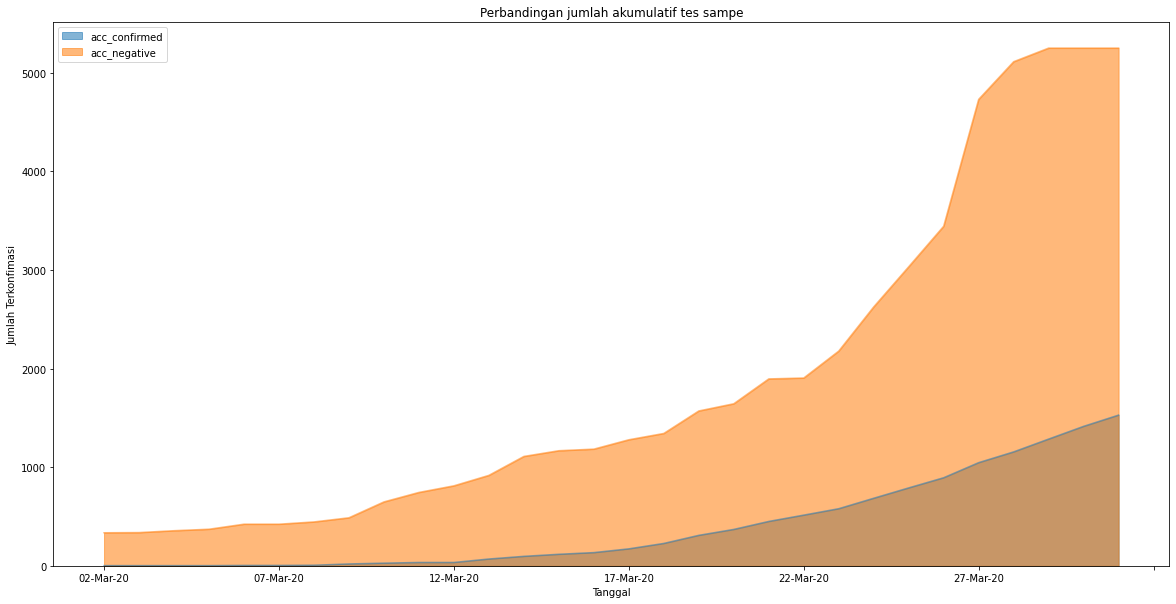

In [246]:
line.plot(kind='area', stacked=False, alpha=0.55, figsize=(20, 10))

plt.title('Perbandingan jumlah akumulatif tes sampe')
plt.ylabel('Jumlah Terkonfimasi')
plt.xlabel('Tanggal')

plt.show()

**SOAL 2**

Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.
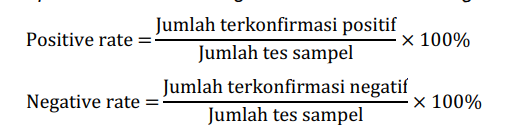

• Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan 
negativity rate untuk periode waktu yang tersedia.

• Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?

• Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [247]:
barplot = line
barplot.sample(5)

,acc_confirmed,acc_negative
date,,
03-Mar-20,2,337
08-Mar-20,6,445
02-Mar-20,2,335
07-Mar-20,4,422
14-Mar-20,96,1109


In [248]:
barplot = df_1[['date','acc_tested','acc_confirmed','acc_negative']]
barplot['Positive_Rate'] = (( df_1['acc_confirmed'] / df_1['acc_tested'] ) * 100)
barplot['Negative_Rate'] = (( df_1['acc_negative'] / df_1['acc_tested'] ) * 100)
barplot.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,acc_tested,acc_confirmed,acc_negative,Positive_Rate,Negative_Rate
4,06-Mar-20,450,4,422,0.888889,93.777778
12,14-Mar-20,1205,96,1109,7.966805,92.033195
23,25-Mar-20,3822,790,3032,20.669806,79.330194
28,30-Mar-20,6663,1414,5249,21.221672,78.778328
16,18-Mar-20,1592,227,1342,14.258794,84.296482


In [249]:
barplot = barplot.set_index('date')

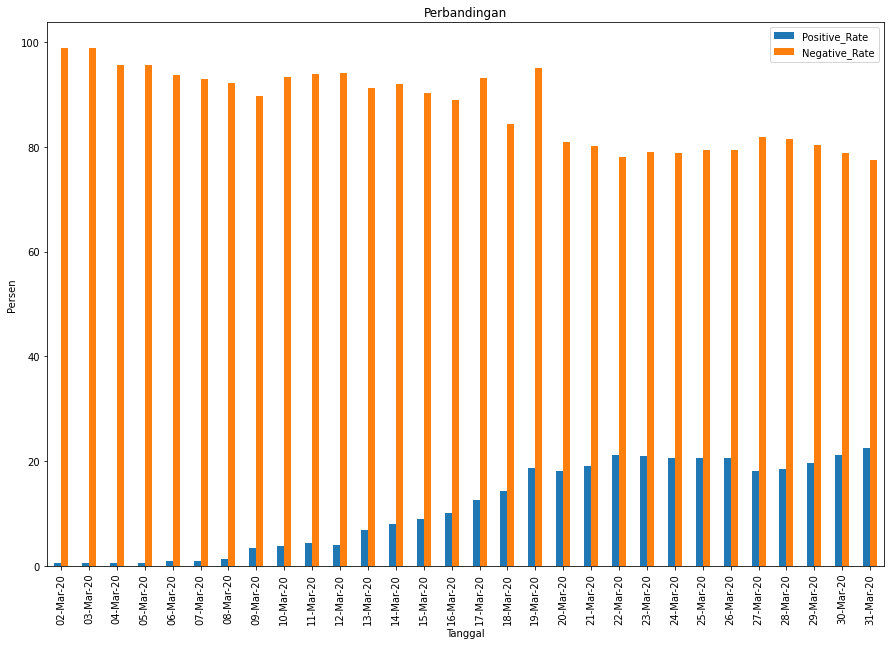

In [250]:
barplot[['Positive_Rate','Negative_Rate']].plot(kind='bar', figsize=(15, 10))

plt.xlabel('Tanggal') # add to x-label to the plot
plt.ylabel('Persen') # add y-label to the plot
plt.title('Perbandingan') # add title to the plot

plt.show()

In [251]:
PR = barplot['Positive_Rate'] == barplot['Positive_Rate'].max()
NR = barplot['Negative_Rate'] == barplot['Negative_Rate'].max()
print(barplot[PR]['Positive_Rate'])
print(barplot[NR]['Negative_Rate'])

date
31-Mar-20    22.54685
Name: Positive_Rate, dtype: float64
date
03-Mar-20    98.826979
Name: Negative_Rate, dtype: float64


Persentase Tertinggi positive rate jatuh pada tanggal 31-Mar-20

Sedangkan untuk negative rate jatuh pada tanggap 03-Mar-20

**SOAL 3**

• Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada 
dataset.

• Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan penjelasan terkait nilai korelasi tersebut.

• Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan penjelasan terkait nilai korelasi tersebut

In [252]:
heatmap = df_1
heatmap = heatmap.set_index('date')
heatmap.sample(5)

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
date,,,,,,,
31-Mar-20,114,6777,114,1528,5249,0,1311
18-Mar-20,220,1592,55,227,1342,23,197
27-Mar-20,1439,5775,153,1046,4729,0,913
22-Mar-20,73,2438,64,514,1904,20,437
09-Mar-20,60,543,13,19,487,37,19


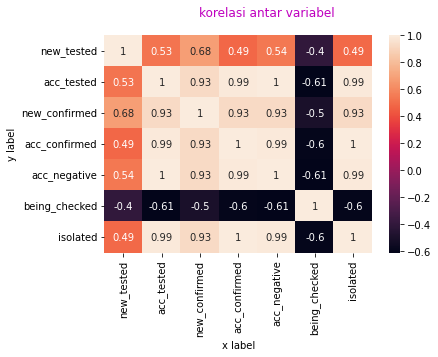

In [253]:
plt.figure()
plt.suptitle("korelasi antar variabel", color='m')

ax = sns.heatmap(heatmap.corr(), annot=True)
ax.set(xlabel='x label', ylabel='y label')

plt.show()

In [254]:
heatmap.corr()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
new_tested,1.000000,0.529012,0.681682,0.488240,0.541540,-0.402717,0.494872
acc_tested,0.529012,1.000000,0.927075,0.992487,0.999088,-0.611367,0.992602
new_confirmed,0.681682,0.927075,1.000000,0.925703,0.929067,-0.504804,0.928491
acc_confirmed,0.488240,0.992487,0.925703,1.000000,0.987653,-0.599737,0.999920
acc_negative,0.541540,0.999088,0.929067,0.987653,1.000000,-0.613971,0.987858
being_checked,-0.402717,-0.611367,-0.504804,-0.599737,-0.613971,1.000000,-0.600341
isolated,0.494872,0.992602,0.928491,0.999920,0.987858,-0.600341,1.000000


In [255]:
df_heatmap = heatmap.corr()
df_heatmap = df_heatmap.replace([1.000000],0)
print(df_heatmap.idxmax())
print(df_heatmap.max())

new_tested       new_confirmed
acc_tested        acc_negative
new_confirmed     acc_negative
acc_confirmed         isolated
acc_negative        acc_tested
being_checked    being_checked
isolated         acc_confirmed
dtype: object
new_tested       0.681682
acc_tested       0.999088
new_confirmed    0.929067
acc_confirmed    0.999920
acc_negative     0.999088
being_checked    0.000000
isolated         0.999920
dtype: float64


Tampilan diatas merupakan nilai variable yang tiap data memiliki korelasi yang tinggi terhadap data lainnya, dalam contoh kasusnya bisa dilihat pada data **isolated** dengan **acc_confirmed** yang memiliki nilai hampir mendekati **1**

In [256]:
print(df_heatmap.idxmin())
print(df_heatmap.min())

new_tested       being_checked
acc_tested       being_checked
new_confirmed    being_checked
acc_confirmed    being_checked
acc_negative     being_checked
being_checked     acc_negative
isolated         being_checked
dtype: object
new_tested      -0.402717
acc_tested      -0.611367
new_confirmed   -0.504804
acc_confirmed   -0.599737
acc_negative    -0.613971
being_checked   -0.613971
isolated        -0.600341
dtype: float64


Tampilan diatas merupakan nilai variable yang tiap data memiliki korelasi yang rendah terhadap data lainnya. yang artinya tiap data tersebut tidak ada hubungan dengan data lainnya. bisa dilihat kalau paling rendah memiliki nilai **negatif**

**SOAL 4**

• Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap 
populasi per km2 untuk masing-masing provinsi.

• Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut 
untuk masing-masing provinsi.

• Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya

In [257]:
df_2 = pd.read_csv("https://raw.githubusercontent.com/manusia-kesekian/Visdat_MidProject/master/Data%20Set/Data%20Set%202.csv?token=AONK7GRIVOE2Y5N4KRQPR63BRNS62")
df_2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


Data Set 2

Data set ini menyajikan data spasial terkait kasus COVID-19 di masing-masing provinsi di Indonesia. Data yang disajikan di antaranya jumlah populasi, jumlah kasus positif, dan lain-lain.

provinsi_id: id provinsi berdasarkan abjad

nama_provinsi: nama provinsi dalam bahasa indonesia

pulau: pulau terletak

iso_code: kode ISO provinsi

capital_city: nama ibu kota

penduduk: jumlah perkiraan penduduk berdasarkan sensus 2014

population_kmsquare: jumlah populasi per kilo meter persegi

dikonfirmasi: jumlah kasus yang dikonfirmasi

meninggal: jumlah kasus meninggal

dibebaskan: jumlah kasus yang dibebaskan


In [258]:
df_2['perbandingan'] = df_2['confirmed']/df_2['population_kmsquare']*100
df_2.sample(5)

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,perbandingan
21,22,Nusa Tenggara Barat,Kepulauan Nusa Tenggara,NB,Mataram,4773795,239,2,0,0,116.444.092,-8.635.334,0.836820
5,6,DKI Jakarta,Jawa,JK,Jakarta,10012271,1353,598,51,31,106.853.027,-6.162.401,44.198078
17,18,Kepulauan Riau,Sumatra,KR,Tanjungpinang,1917415,237,5,1,0,104.468.994,0.999705,2.109705
33,34,Sumatra Utara,Sumatra,SU,Medan,13766851,189,8,1,0,98.712.158,323.924,4.232804
7,8,Jambi,Sumatra,JA,Jambi,3344400,63,1,0,0,103.623.047,-1.625.758,1.587302


In [259]:
barplot_provinsi =  df_2[['province_name','perbandingan']]
barplot_provinsi = barplot_provinsi.set_index('province_name')
barplot_provinsi.sample(5)

,perbandingan
province_name,
DKI Jakarta,44.198078
Nusa Tenggara Barat,0.836820
Kepulauan Bangka Belitung,0.000000
DI Yogyakarta,1.940035
Sulawesi Barat,0.000000


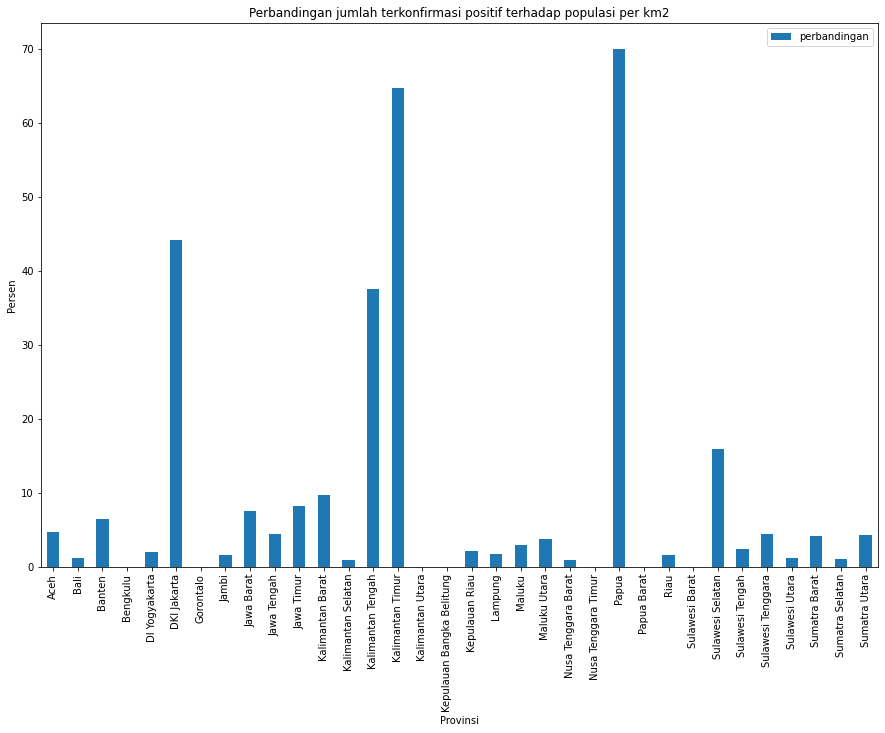

In [260]:
barplot_provinsi.plot(kind='bar', figsize=(15, 10))

plt.xlabel('Provinsi') # add to x-label to the plot
plt.ylabel('Persen') # add y-label to the plot
plt.title('Perbandingan jumlah terkonfirmasi positif terhadap populasi per km2') # add title to the plot

plt.show()

In [261]:
barplot_provinsi.sort_values(['perbandingan'], ascending=False, inplace=True)
barplot_provinsi.head(3)

,perbandingan
province_name,
Papua,70.000000
Kalimantan Timur,64.705882
DKI Jakarta,44.198078


**Soal 5**

Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk masing-masing pulau

In [262]:
island = df_2['island'].unique()
df = pd.DataFrame(island,columns=['island']) 
island

array(['Sumatra', 'Kepulauan Nusa Tenggara', 'Jawa', 'Sulawesi',
       'Kalimantan', 'Kepulauan Maluku', 'Papua'], dtype=object)

In [266]:
sum = []
for i in range(len(island)):
  temp = df_2.loc[df_2['island'] == island[i], 'confirmed'].sum()
  sum.append(temp)
sum = np.array(sum)
pie = pd.DataFrame({'Island':island, 'Jumlah':sum})
pie

,Island,Jumlah
0,Sumatra,29
1,Kepulauan Nusa Tenggara,11
2,Jawa,911
3,Sulawesi,35
4,Kalimantan,22
5,Kepulauan Maluku,2
6,Papua,7


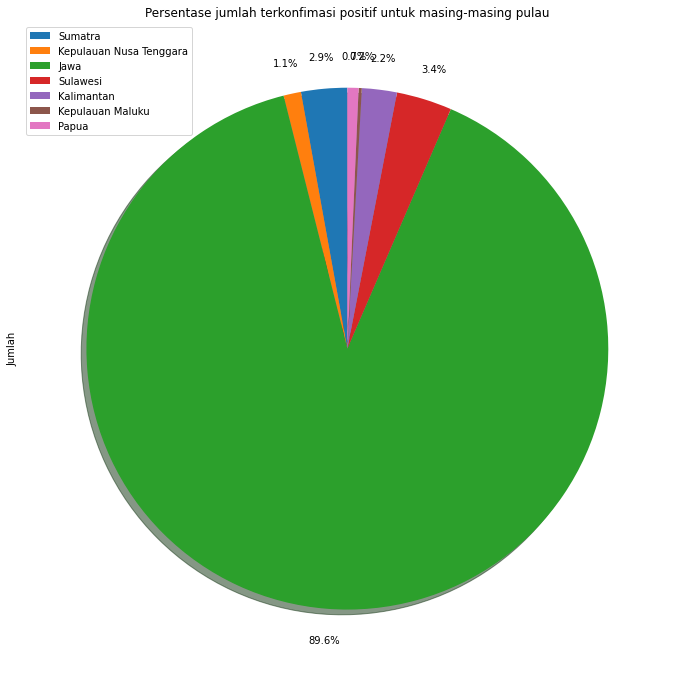

In [267]:
pie['Jumlah'].plot(kind='pie',figsize=(30, 12),autopct='%1.1f%%',startangle=90, shadow=True,labels=None,pctdistance=1.12)
plt.title('Persentase jumlah terkonfimasi positif untuk masing-masing pulau')
plt.legend(labels=pie['Island'], loc='upper left') 
plt.show()